# Projeto Integrador: Matemática Computacional (Group 34)
## Introduction (Sprint 3)

During sprint 3 we were tasked to find solutions for the MATCP user stories (US15 and US16), wich were mainly focused on linear regression and polynomial regression.

The work presented in this file is a collaborative solution by our team, wich was developed in Python along with the explanation of the results following the aceptance criteria of the client.

`Libraries imported to solve the user stories:`

In [678]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp  

`Read files used for the user stories:`

In [679]:
dataHeaders = ['Park','Year', 'Month', 'Day', 'Consumption']
df_water_consumption = pd.read_csv('water_consumption_updated.csv', sep=';', names=dataHeaders, skiprows=1);
df_water_consumption['Consumption'] = df_water_consumption['Consumption'].str.replace(',', '.')
df_water_consumption['Consumption'] = pd.to_numeric(df_water_consumption['Consumption'])
df_water_consumption['Month'] = pd.to_numeric(df_water_consumption['Month'])

areaHeaders = ['Park', 'Area']
areaData = pd.read_csv('area.csv', sep=';', names=areaHeaders, skiprows=1);
areaData['Area'] = areaData['Area'].str.replace(',', '.')
areaData['Area'] = pd.to_numeric(areaData['Area'])

us14_headers = ['size','time']
us14_data = pd.read_csv('solution_us14.csv', sep=';', names=us14_headers, skiprows=1);
us14_data['size'] = pd.to_numeric(us14_data['size'], errors='coerce')
us14_data['time'] = us14_data['time'].str.replace(',', '.')
us14_data['time'] = pd.to_numeric(us14_data['time'], errors='coerce')

---
# USER STORY 15 - Introduction

`The monthly cost associated with water consumption in each park is related to its size. Consider the file ”water consumption updated.csv”
adapted from the file used in US09, in which the daily water consumption of more parks were inserted. The file ”Area.csv” has the area (in hectares) of each park. Consider that the cost of water consumed follows the rules defined in US09. The park management company is considering starting to manage a new 55-hectare park. Predict the average monthly cost that will be paid for water consumption in this new park. Apply the linear regression model, considering the park area as the independent variable and the average monthly cost spent on water consumption as the response variable. Start by studying the feasibility of linear adjustment.`

To solve this problem we'll use linear regression if it proves to be feasable. To study the feasibility of linear adjustment we'll calculate the pearson's coeficient. The formula for Pearson's correlation coeficient is:

$$
    Sxx = {}\sum_{i=1}^{n} (x_i - \overline{x})^2
$$
$$
    Syy = {}\sum_{i=1}^{n}(y_i - \overline{y})^2
$$
$$
    Sxy = {}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})
$$
$$
    r = \frac{Sxy} {\sqrt{Sxx \cdot Syy}}
$$

The linear regression equation is defined by:

$$
    E(Y|x) = \beta_0 + \beta_1 \cdot x
$$

Where B0 and B1 are the regression coeficients


The correlation is: 0.946


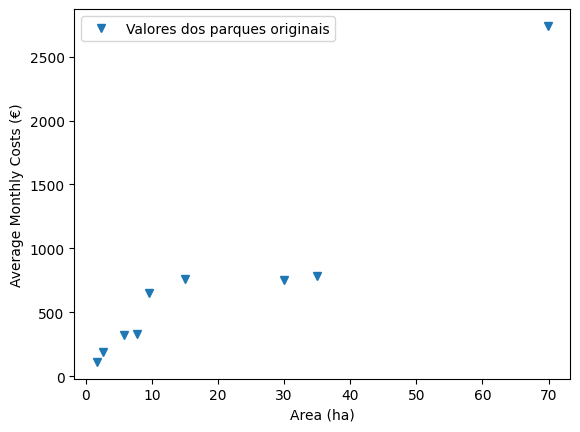

In [680]:
df_water_consumption_monthly = df_water_consumption.groupby(['Park', 'Year', 'Month'])['Consumption'].sum().reset_index()
df_nmonths = df_water_consumption_monthly.groupby(['Park'])['Month'].count().reset_index()
df_water_consumption_monthly['Costs'] = df_water_consumption_monthly['Consumption'].apply(lambda x: x*0.7 if x <= 1000 else 1000 * 0.7 + (x-1000)* 0.7 * 1.15)
df_water_consumption_monthly = df_water_consumption_monthly.groupby(['Park'])['Costs'].sum().reset_index() 
df_water_consumption_monthly = df_water_consumption_monthly.merge(df_nmonths, on='Park')

df_avg_monthly_costs = df_water_consumption_monthly.copy()
df_avg_monthly_costs['avgMonthlyCost'] = df_water_consumption_monthly['Costs'].div(df_water_consumption_monthly['Month'])

df_avg_monthly_costs = df_avg_monthly_costs.merge(areaData, on='Park')

df_avg_monthly_costs = df_avg_monthly_costs.sort_values(by='avgMonthlyCost')

x = df_avg_monthly_costs['Area'].values
y = df_avg_monthly_costs['avgMonthlyCost'].values

corr_r, pearson_r = sp.stats.pearsonr(x,y)

df = pd.DataFrame({'x':x, 'y':y})  # Corrected this line
plt.plot(df.x, df.y, 'v', label='Valores dos parques originais')
plt.xlabel('Area (ha)')
plt.ylabel('Average Monthly Costs (€)')
plt.legend()

print(f"\nThe correlation is: {corr_r:.3f}")

# Interpretation:

The observed Pearson coeficient is 0.946 (0.8 ≤ r < 1), we can say it has a strongly positive correlation. Therefore, linear regression is applicable for these values. 

The diagram shows how the area of the park relate to the average monthly water consumption cost, indicating a trend of increasing water consumption costs as the park area increases, 
this suggests that as park area increases, water consumption costs also tend to increase consistently. 

Analyzing a the diagram also helps to determine if a linear regression model is appropriate for predicting water costs based on park area. The distinct linear pattern observed in the 
diagram greatly increases the reliability of using a linear regression model for this prediction. The linear trend in the data indicates that a straight-line model can effectively 
capture the relationship between park area and water costs, making the predictions and interpretations straightforward.

Varas average monthly water consumption costs is 112.65€ (expected: 129.38€) (offset: 16.73€)
ArcaAgua average monthly water consumption costs is 191.43€ (expected: 159.85€) (offset: 31.58€)
SaoRoque average monthly water consumption costs is 325.17€ (expected: 268.21€) (offset: 56.96€)
Covelo average monthly water consumption costs is 333.15€ (expected: 332.54€) (offset: 0.60€)
PalacioCristal average monthly water consumption costs is 649.94€ (expected: 396.88€) (offset: 253.06€)
Avioso average monthly water consumption costs is 755.19€ (expected: 1087.64€) (offset: 332.45€)
Oriental average monthly water consumption costs is 759.31€ (expected: 579.73€) (offset: 179.58€)
Biologico average monthly water consumption costs is 783.39€ (expected: 1256.95€) (offset: 473.55€)
Cidade average monthly water consumption costs is 2739.64€ (expected: 2438.69€) (offset: 300.95€)

The regression line equation is: y = 71.816 + 33.861x

Expected water monthly cost for a 55 hectare park:  1934.17 €


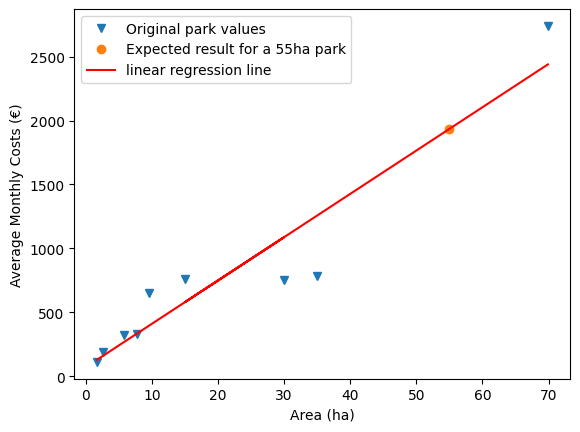

In [681]:
Sxx = 0; Syy = 0; Sxy = 0
media_x = np.mean(x); media_y = np.mean(y)

for value_x in x:
    Sxx += (value_x - media_x)**2
for value_y in y:
    Syy += (value_y - media_y)**2
for index in range(len(x)):
    Sxy += (x[index] - media_x) * (y[index] - media_y)

modelo = sp.stats.linregress(x, y)

for index, row in df_avg_monthly_costs.iterrows():
    print(f"{row['Park']} average monthly water consumption costs is {row['avgMonthlyCost']:.2f}€ (expected: {modelo.intercept + modelo.slope*row['Area']:.2f}€) (offset: {abs(row['avgMonthlyCost'] - (modelo.intercept + modelo.slope*row['Area'])):.2f}€)")

print(f'\nThe regression line equation is: y = {modelo.intercept:.3f} + {modelo.slope:.3f}x')

df = pd.DataFrame({'x':x, 'y':y})  # Corrected this line
plt.plot(df.x, df.y, 'v', label='Original park values')
plt.plot(55, modelo.intercept + modelo.slope*55,'o', label='Expected result for a 55ha park')
plt.plot(df.x, modelo.intercept + modelo.slope*df.x, 'r', label='linear regression line')
plt.xlabel('Area (ha)')
plt.ylabel('Average Monthly Costs (€)')
plt.legend()

print("\nExpected water monthly cost for a 55 hectare park: ", f"{modelo.intercept + modelo.slope*55:.2f}" , "€" );

# Interpretation:


The accuracy of the regression equation estimates varies among different parks. For instance, in Covelo, the estimated water costs (332.54€) are nearly identical to the observed 
value (333.15€), with a minimal discrepancy of 0.60€. This indicates that the regression equation effectively captures the linear relationship for this park. Conversely, in parks 
like Biological, Avioso, Cidade, and PalacioCristal, there are significant discrepancies (over 250€) between observed and estimated values. These deviations could be due to 
unaccounted factors in the regression, such as irrigation system efficiency, additional aquatic features, various vegetation types and their water needs, and different water 
management practices.

If the park management company considers starting managing a new 55-hectare park, the expected average monthly water consumption cost will be 1934.17€ following our linear regression 
equation. However, this value might not be close to the real value since many outside factors could influence this value to be higher or lower, to deal with this problem the manager 
could provide a confidence interval at wich we could calculate the aproximate variation the monthly costs could take. 

The regression equation reveals a clear linear trend: parks with larger areas generally incur higher water costs. However, the observed variation in data compared to the estimates 
suggests that park-specific factors also influence water costs. This is particularly evident in the significant deviations noted in some parks, where local specifics considerably 
impact costs. In summary, the linear regression equation serves as a useful tool for predicting water costs based on land area.

---
# USER STORY 16

`Consider the data and results associated with US14. Applying polynomial regression, determine the best line that fits the data.`

In order to determine the polynomial regression line that best fits the data we'll use the polynomial regression formula:
Where Y is dependent variable representing time in ms and X is the independent variable representing the size of the graph that's being studied.

$$
    y = \beta_0 + \beta_1 \cdot x + \beta_2 \cdot x^2 + \beta_3 \cdot x^3 + (...) + \beta_m \cdot x^m + \epsilon
$$


The polynomial equation is: 0.1214 + -0.0001*x^1 + 0.1214*x^2


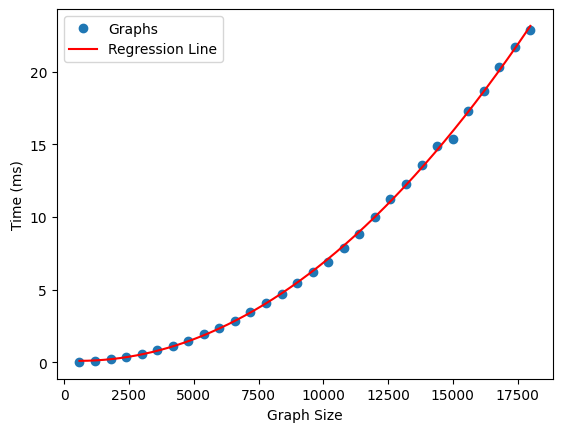

In [682]:
#use polynominal regression to generate the model
poly_model = np.polyfit(us14_data['size'], us14_data['time'], 2)
poly_function = np.poly1d(poly_model)

equation = f"{poly_model[-1]:.4f}"
for i in range(1, len(poly_model)):
    equation += f" + {poly_model[i]:.4f}*x^{i}"

x_range = np.linspace(us14_data['size'].min(), us14_data['size'].max(), 500)

plt.plot(us14_data['size'], us14_data['time'], 'o', label='Graphs')
plt.plot(x_range, poly_function(x_range), 'r', label='Regression Line')
plt.xlabel('Graph Size'); plt.ylabel('Time (ms)')
plt.legend()

print(f"\nThe polynomial equation is: {equation}")

# Interpretation

As we can see in the resulting diagram, using polynomial regression is feasable since the data reveals a polynomial trend, where graphs with higher vertex count generaly take more time to be read by the algorithm (Kruskal algorithm in this case). This polynomial pattern is also evident by the curvature of the plotted data.

Taking this into account, we can conclude that graphs with higher vertex counts will be more tasking for the computer to process and therefore take more time to be processed by the algorithm.

----
## Contribution of each member of the group to the development of the work

#### `70%` - Rui Santiago(1221402)
#### `30%` - Francisco Trocado(1230608)
#### `0%` - Diógenes Jesus(1210879)
#### `0%` - Alexandre Moura(1231193)
#### `100%` ---------------------